In [1]:
import subprocess
import os

import pandas as pd

import requests                   #Data scraping
from bs4 import BeautifulSoup

import json

pd.set_option('display.max_rows',500)

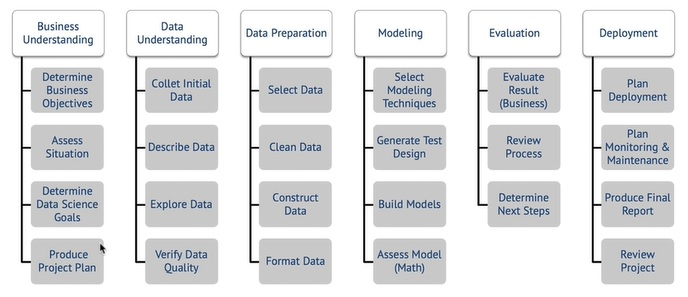

* RKI (scraping): https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html
* John Hopkins (Github): https://github.com/CSSEGISandData/COVID-19.git
* REST API services https://npgeo-corona-npgeo-de.hub.arcgis.com/


In [12]:

git_pull = subprocess.Popen("/usr/bin/git pull" ,
                    cwd = os.path.dirname("../data/raw/COVID-19/" ),
                    shell = True,
                    stdout = subprocess.PIPE,
                    stderr = subprocess.PIPE)

(out, error) = git_pull.communicate()

print('Error : ' + str(error))
print('out : ' + str(out))

NotADirectoryError: [WinError 267] Der Verzeichnisname ist ungültig

In [50]:
print(os.getcwd())

C:\Users\hp\ads_covid-19\notebooks


In [19]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [20]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,179321,179328,179477,179597,179624,179674,179716,179716,179771,179835
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,275621,275688,275732,275732,275732,275838,275864,275881,275939,275985
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265823,265828,265834,265841,265847,265851,265854,265855,265860,265862
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,42156,42156,42572,42572,42572,42572,42572,42572,42572,42894
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99433,99527
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,7795,7795,7855,7910,7910,7942,7942,7982,7982,8062
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9135308,9135308,9135308,9135308,9135308,9135308,9178795,9178795,9178795,9178795
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422917,422917,422917,422917,422917,422917,422917,422939,422939,422939
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,120638,121713,122718,123655,124477,125220,125828,126633,127556,128440


In [22]:
page = requests.get('https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html')

In [23]:
soup = BeautifulSoup(page.content, 'html.parser')

In [24]:
soup.get_text()

'\n\n\n\n\nRKI  -  Coronavirus SARS-CoV-2 - COVID-19: Fallzahlen in Deutschland und weltweit\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNavigation und Service\nSpringe direkt zu:\n\nInhalt\nHauptmenu\nSuche\n\n\n\n\n\n\n\nServicemenü\nKon\xadtaktIn\xadhaltHil\xadfeIm\xadpres\xads\xadumDa\xadten\xadschut\xadz\xader\xadklä\xadrungRSSEnglish\n\n\n\n\nErklärung zur Barrierefreiheit\n\n\nGebärdensprache\n\n\nLeichte Sprache\n\n\n\n\nSuche\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nKontakt\nNavigation\n\n\n\nZielgruppeneinstiege\n\n\n\n\nInfektionskrankheiten A-Z\n\n\n\nA\nB\nC\nD\nE\nF\nG\nH\nI\nJ\nK\nL\nM\nN\nO\nP\nQ\nR\nS\nT\nU\nV\nW\nX\nY\nZ\nalle\n\n\n\n\n\n\n\n\nGesundheit A-Z\n\n\n\nA\nB\nC\nD\nE\nF\nG\nH\nI\nJ\nK\nL\nM\nN\nO\nP\nQ\nR\nS\nT\nU\nV\nW\nX\nY\nZ\nalle\n\n\n\n\n\n\n\nNavigation\n\nIn\xadsti\xadtut\nGe\xadsund\xadheits\xadmo\xadni\xadto\xadring\nIn\xadfek\xadti\xadons\xadschutz\nForschung\nKom\xadmis\xadsio\xadnen\nSer\xadvice\n\n\n\n\n\n\nZiel

In [25]:
html_table = soup.find('table')

In [27]:
all_rows = html_table.find_all('tr')

In [35]:
final_data_list = []

for pos,rows in enumerate(all_rows):
    print(pos)
    #print(rows)
    col_list= [each_col.get_text(strip=True) for each_col in rows.find_all('td')]
    final_data_list.append(col_list)
    #print(col_list)

0
[]
1
[]
2
['Baden-Württem\xadberg', '3.658.041', '1', '19.914', '179,4', '16.099']
3
['Bayern', '4.876.611', '0', '29.111', '221,5', '24.009']
4
['Berlin', '1.045.197', '25', '7.407', '202,2', '4.608']
5
['Branden\xadburg', '788.200', '0', '3.202', '126,5', '5.662']
6
['Bremen', '199.618', '0', '2.115', '311,0', '774']
7
['Hamburg', '579.767', '0', '3.580', '193,3', '2.646']
8
['Hessen', '1.847.349', '0', '17.216', '273,6', '10.111']
9
['Meck\xadlenburg-Vor\xadpommern', '485.492', '0', '2.674', '166,0', '2.227']
10
['Nieder\xadsachsen', '2.347.602', '0', '21.843', '272,9', '9.270']
11
['Nord\xadrhein-West\xadfalen', '5.253.711', '1.826', '40.975', '228,6', '25.358']
12
['Rhein\xadland-Pfalz', '1.145.383', '0', '7.519', '183,5', '5.675']
13
['Saarland', '314.108', '0', '1.675', '170,2', '1.677']
14
['Sachsen', '1.505.942', '0', '4.250', '104,8', '15.506']
15
['Sachsen-Anhalt', '715.386', '0', '2.553', '117,1', '5.344']
16
['Schles\xadwig-Holstein', '729.388', '0', '9.842', '338,1', '2

In [36]:
final_data_list

[[],
 [],
 ['Baden-Württem\xadberg', '3.658.041', '1', '19.914', '179,4', '16.099'],
 ['Bayern', '4.876.611', '0', '29.111', '221,5', '24.009'],
 ['Berlin', '1.045.197', '25', '7.407', '202,2', '4.608'],
 ['Branden\xadburg', '788.200', '0', '3.202', '126,5', '5.662'],
 ['Bremen', '199.618', '0', '2.115', '311,0', '774'],
 ['Hamburg', '579.767', '0', '3.580', '193,3', '2.646'],
 ['Hessen', '1.847.349', '0', '17.216', '273,6', '10.111'],
 ['Meck\xadlenburg-Vor\xadpommern', '485.492', '0', '2.674', '166,0', '2.227'],
 ['Nieder\xadsachsen', '2.347.602', '0', '21.843', '272,9', '9.270'],
 ['Nord\xadrhein-West\xadfalen',
  '5.253.711',
  '1.826',
  '40.975',
  '228,6',
  '25.358'],
 ['Rhein\xadland-Pfalz', '1.145.383', '0', '7.519', '183,5', '5.675'],
 ['Saarland', '314.108', '0', '1.675', '170,2', '1.677'],
 ['Sachsen', '1.505.942', '0', '4.250', '104,8', '15.506'],
 ['Sachsen-Anhalt', '715.386', '0', '2.553', '117,1', '5.344'],
 ['Schles\xadwig-Holstein', '729.388', '0', '9.842', '338,1', 

In [38]:
pd.DataFrame(final_data_list).dropna().rename(columns={0:'State'})

,State,1,2,3,4,5
2,Baden-Württem­berg,3.658.041,1,19.914,"179,4",16.099
3,Bayern,4.876.611,0,29.111,"221,5",24.009
4,Berlin,1.045.197,25,7.407,"202,2",4.608
5,Branden­burg,788.200,0,3.202,"126,5",5.662
6,Bremen,199.618,0,2.115,"311,0",774
7,Hamburg,579.767,0,3.580,"193,3",2.646
8,Hessen,1.847.349,0,17.216,"273,6",10.111
9,Meck­lenburg-Vor­pommern,485.492,0,2.674,"166,0",2.227
10,Nieder­sachsen,2.347.602,0,21.843,"272,9",9.270
11,Nord­rhein-West­falen,5.253.711,1.826,40.975,"228,6",25.358


# REST APIs

In [40]:
url = "https://coronavirus-smartable.p.rapidapi.com/news/v1/US/"

headers = {
	"X-RapidAPI-Host": "coronavirus-smartable.p.rapidapi.com",
	"X-RapidAPI-Key": "63cbdd2780msh8791e6b54ef44d5p1a8d3djsna89eee5097f3"
}

response = requests.request("GET", url, headers=headers)

print(response.text)

{
  "location": {
    "long": -95.712891,
    "countryOrRegion": "United States",
    "provinceOrState": null,
    "county": null,
    "isoCode": "US",
    "lat": 37.09024
  },
  "updatedDateTime": "2021-02-26T06:49:51.9236425Z",
  "news": [
    {
      "path": "_news/2021-02-25-citizens-united-rolls-out-anti-biden-campaign-to-fight-back-against-agenda-defend-trumps-record.md",
      "title": "Citizens United rolls out anti-Biden campaign to 'fight back' against agenda, defend Trump's record",
      "excerpt": "The conservative Citizens United group on Thursday rolled out a new anti-Biden campaign in an effort to \"fight back\" against President Biden's agenda and defend the \"successful America first policies\" of former President Trump.",
      "sourceUrl": null,
      "webUrl": "https://www.foxnews.com/politics/citizens-united-anti-biden-campaign-defend-trump-record",
      "originalUrl": "https://www.foxnews.com/politics/citizens-united-anti-biden-campaign-defend-trump-record",
   

In [41]:
response.content


b'{\n  "location": {\n    "long": -95.712891,\n    "countryOrRegion": "United States",\n    "provinceOrState": null,\n    "county": null,\n    "isoCode": "US",\n    "lat": 37.09024\n  },\n  "updatedDateTime": "2021-02-26T06:49:51.9236425Z",\n  "news": [\n    {\n      "path": "_news/2021-02-25-citizens-united-rolls-out-anti-biden-campaign-to-fight-back-against-agenda-defend-trumps-record.md",\n      "title": "Citizens United rolls out anti-Biden campaign to \'fight back\' against agenda, defend Trump\'s record",\n      "excerpt": "The conservative\xc2\xa0Citizens United group on Thursday rolled out a new anti-Biden campaign in an effort to \\"fight back\\" against President Biden\'s agenda and defend the \\"successful America first policies\\" of former President Trump.",\n      "sourceUrl": null,\n      "webUrl": "https://www.foxnews.com/politics/citizens-united-anti-biden-campaign-defend-trump-record",\n      "originalUrl": "https://www.foxnews.com/politics/citizens-united-anti-biden-